<h1><center><center><h1><h1><center><span style="color:#2189b5">Telco customer churn</span><center><h1>

# My Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore

# My Figure Size : 

In [2]:
from matplotlib import rcParams            
rcParams['figure.figsize'] = (20,10) 

# Remove Warnings : 

In [3]:
import warnings
warnings.simplefilter("ignore")

# My Dataset :

In [4]:
telco = pd.read_csv('Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<br><br><br><br><br><br>
# Exploring Data : 
<br><br><br>

### Shape of the data : 

In [5]:
print(Fore.LIGHTBLUE_EX + 'Number of row is :',telco.shape[0])
print(Fore.LIGHTBLUE_EX + 'Number of columns is :',telco.shape[1])

Number of row is : 7043
Number of columns is : 21


### Showing the info of the data :

In [6]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Number of complete duplicates : 

In [7]:
print(Fore.LIGHTBLUE_EX + 'Number of complete duplicates is :',telco.duplicated().sum())

Number of complete duplicates is : 0


### Checking if there is customers with same Id : 

In [8]:
print(Fore.LIGHTBLUE_EX + 'Number of Id duplicates is :',telco['customerID'].duplicated().sum())

Number of Id duplicates is : 0


### Checking duplicates after removing Id : 

In [9]:
telco.drop('customerID',axis=1,inplace=True)
print(Fore.LIGHTBLUE_EX + 'Number of duplicates after removing id is :',telco.duplicated().sum())

Number of duplicates after removing id is : 22


In [10]:
telco.drop_duplicates(inplace=True)
print(Fore.LIGHTBLUE_EX + 'Number of duplicates now is :',telco.duplicated().sum())

Number of duplicates now is : 0


### Checking Number of NaN values in the data : 

In [11]:
telco.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Describing Data :  

    - Describing Continuous Data

In [12]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


    - Describing Categorical Data : 

In [13]:
telco.drop(['SeniorCitizen','tenure','MonthlyCharges'],axis=1).describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3541,3619,4911,6339,3368,3090,3490,3080,3087,3465,2802,2777,3853,4161,2359,11,5164


### Showing value counts of categorical data : 

In [14]:
for i in telco.columns:
    if telco[i].dtype == 'object':
        print(Fore.LIGHTBLUE_EX,telco[i].value_counts())
        print(Fore.LIGHTBLACK_EX + '\n--------------------------------------\n\n')

 Male      3541
Female    3480
Name: gender, dtype: int64

--------------------------------------


 No     3619
Yes    3402
Name: Partner, dtype: int64

--------------------------------------


 No     4911
Yes    2110
Name: Dependents, dtype: int64

--------------------------------------


 Yes    6339
No      682
Name: PhoneService, dtype: int64

--------------------------------------


 No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

--------------------------------------


 Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64

--------------------------------------


 No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64

--------------------------------------


 No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64

-----------------------------------

<br><br><br><br><br><br>
## Ok Now I got important informations about the data :  
> - No `Complete duplicates` <br><br>
> - No `NaN values` <br><br>
> - No `Id duplicates` <br><br>
> - After removing `Id` I got 22 duplicate which I removed <br><br> 
> - 3 columns have `continous` data, and rest of them are `discrete` <br><br>
> - `TotalCharges` is recognized as categoral data... while it should be float (we have to clean that !!)

<br><br><br><br>
## Before cleaning the data I will show my dependent variable column...

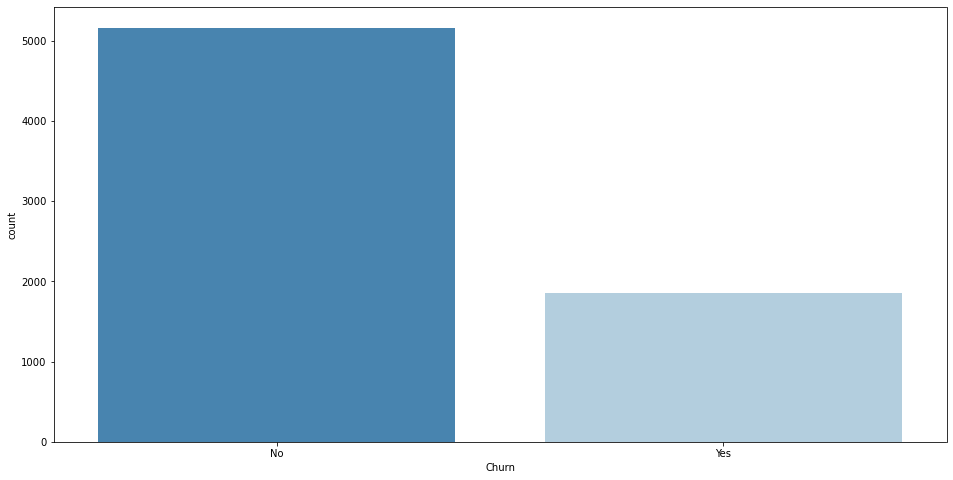

In [15]:
fig = plt.figure(figsize=(16,8))

sns.countplot(x='Churn',data=telco,palette='Blues_r')
plt.show()

## It is clear that data with churn = No is too much more than data with churn = yes

# Now I will split my data into train and test...

In [16]:
from sklearn.model_selection import train_test_split

x = telco.drop('Churn',axis=1)
y = telco[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3276,Female,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.15,317.25
6266,Male,1,No,No,33,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),83.85,2716.3
1324,Female,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,76.35
5201,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.90,164.6
4080,Female,0,Yes,Yes,29,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.10,692.55


In [18]:
y_train.head()

,Churn
3276,Yes
6266,Yes
1324,Yes
5201,No
4080,No


## For visualizations I will make a new dataframe which is `train_set` (X_train + y_train)

In [19]:
train_set = pd.concat([X_train,y_train],axis=1)
train_set.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3276,Female,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.15,317.25,Yes
6266,Male,1,No,No,33,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),83.85,2716.3,Yes
1324,Female,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,76.35,Yes
5201,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.90,164.6,No
4080,Female,0,Yes,Yes,29,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.10,692.55,No


<br><br><br>
## Now I will work on understanding the `train_set` without looking at test (to avoid overfitting by knowing the test relations)
<br><br><br>

# Cleaning Data :

### Let's begin by cleaning `TotalCharges` feature...

In [20]:
print(Fore.LIGHTBLUE_EX+'Number of unique values is TotalCharges is :',len(train_set['TotalCharges'].unique()))

Number of unique values is TotalCharges is : 5286


In [21]:
print(Fore.LIGHTBLUE_EX + '-> Type of "TotalCharges" column is : ',train_set['TotalCharges'].dtype)


try :
    train_set['TotalCharges'] = train_set['TotalCharges'].astype('float')
except :
    print('\n\nThere is error will run here')

-> Type of "TotalCharges" column is :  object


There is error will run here


### Using try-catch approach... Now I know that these column contains data that is not numerical 

### There will be an error while running the code because there is strings in it... and that is the reason why it is recognized as categorical data

In [22]:
def cleaning_total_charges(df): 
    
    """
    This function will clean total charges column,
    1 - It will change type to float and errors will be nan
    2 - it will show type
    3 - it will impute nan by (tenure*MonthlyCharges)
    """
    
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    print(Fore.LIGHTBLUE_EX + 'Type of "TotalCharges" column now is : ',df['TotalCharges'].dtype)
    df["TotalCharges"].fillna(df["tenure"]*df["MonthlyCharges"],inplace=True)
    print(Fore.LIGHTBLUE_EX + 'Number of nan values now is : ',df['TotalCharges'].isna().sum())
    print('\n')

### Now I will make this function modify my (`train_set` and my `X_train`)

In [23]:
cleaning_total_charges(train_set)
cleaning_total_charges(X_train)

Type of "TotalCharges" column now is :  float64
Number of nan values now is :  0


Type of "TotalCharges" column now is :  float64
Number of nan values now is :  0




### Now this column is now fine 
### So that : Number of continous columns now is 4 ;)

In [24]:
train_set.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5616.000000,5616.000000,5616.000000,5616.000000
mean,0.164530,32.358084,64.827030,2283.196554
std,0.370789,24.395826,30.165926,2264.808153
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,402.600000
50%,0.000000,29.000000,70.300000,1399.825000
75%,0.000000,55.000000,90.100000,3782.800000
max,1.000000,72.000000,118.750000,8684.800000


## After treating the categorical columns... let's visualize it 

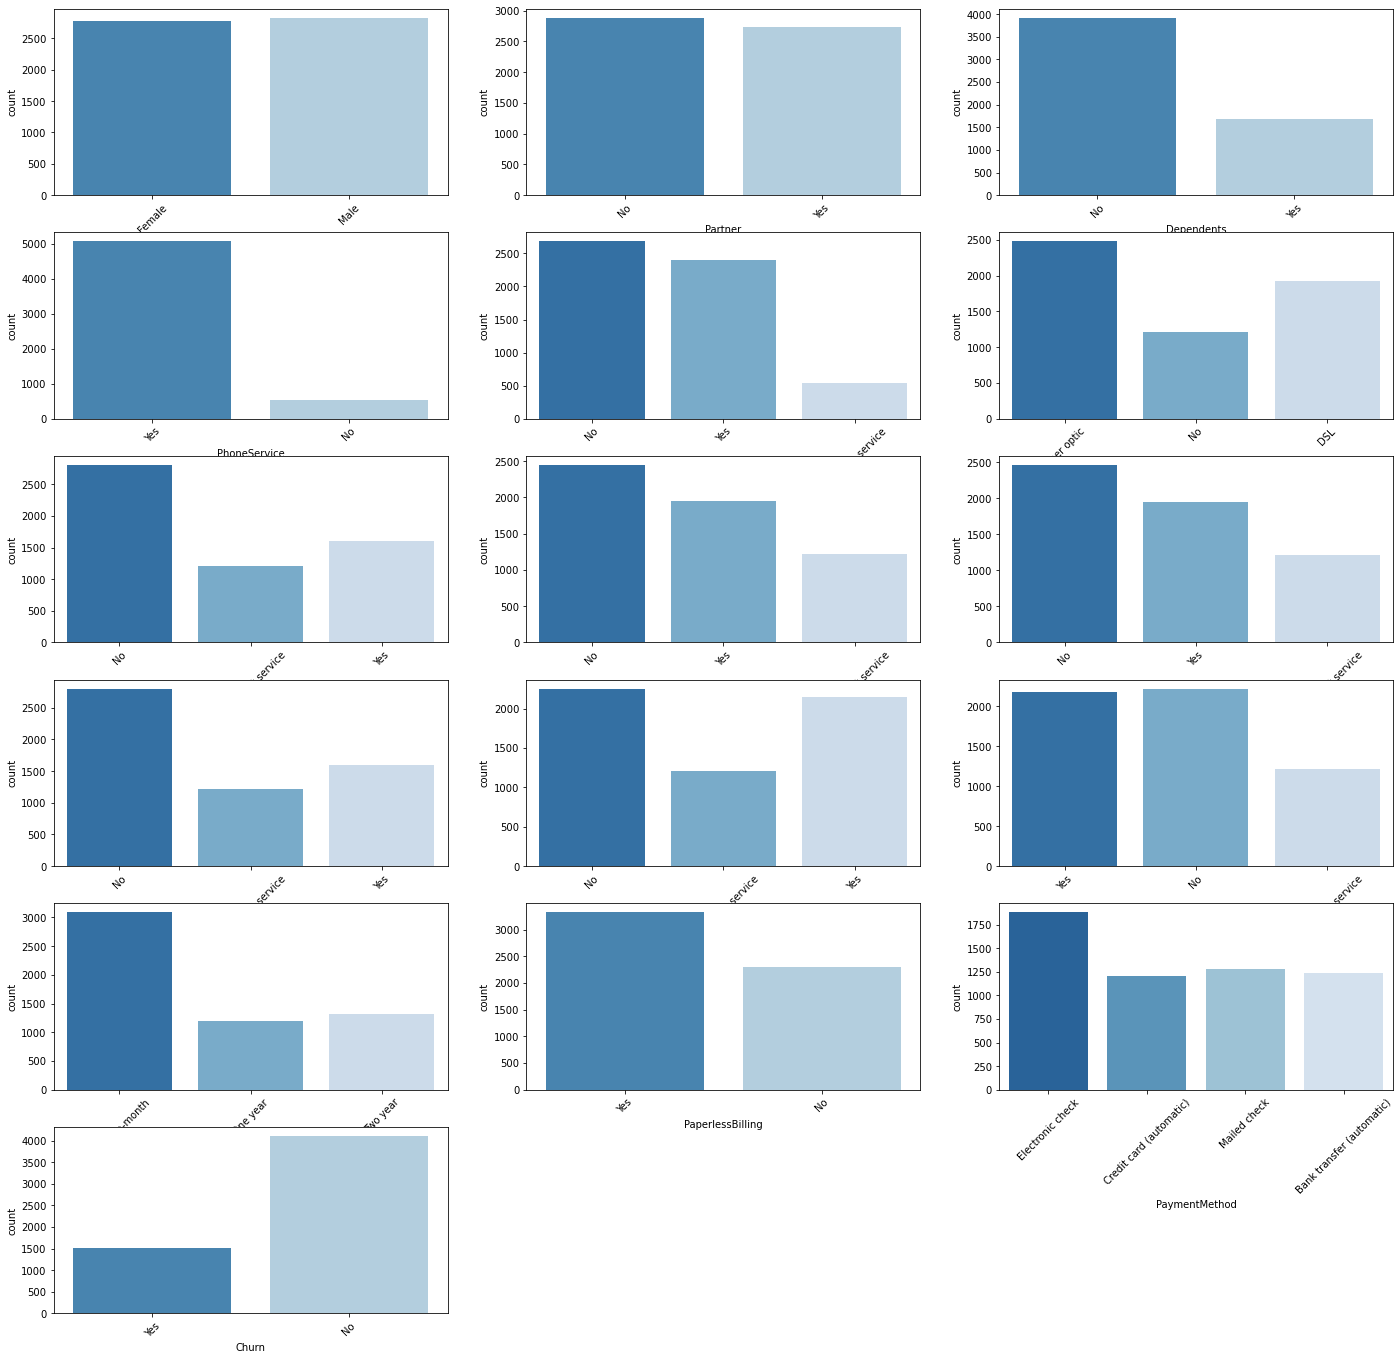

In [25]:
fig = plt.figure(figsize=(24,24))

counter = 0

for i in train_set.columns:
    if train_set[i].dtype == 'object':
        sub = fig.add_subplot(6,3,counter+1)
        g = sns.countplot(x=i,data=train_set,palette='Blues_r')
        plt.xticks(rotation=45)
        counter = counter + 1

## Ok... This is just a countplot for my data let's see how features effects my dependent column.

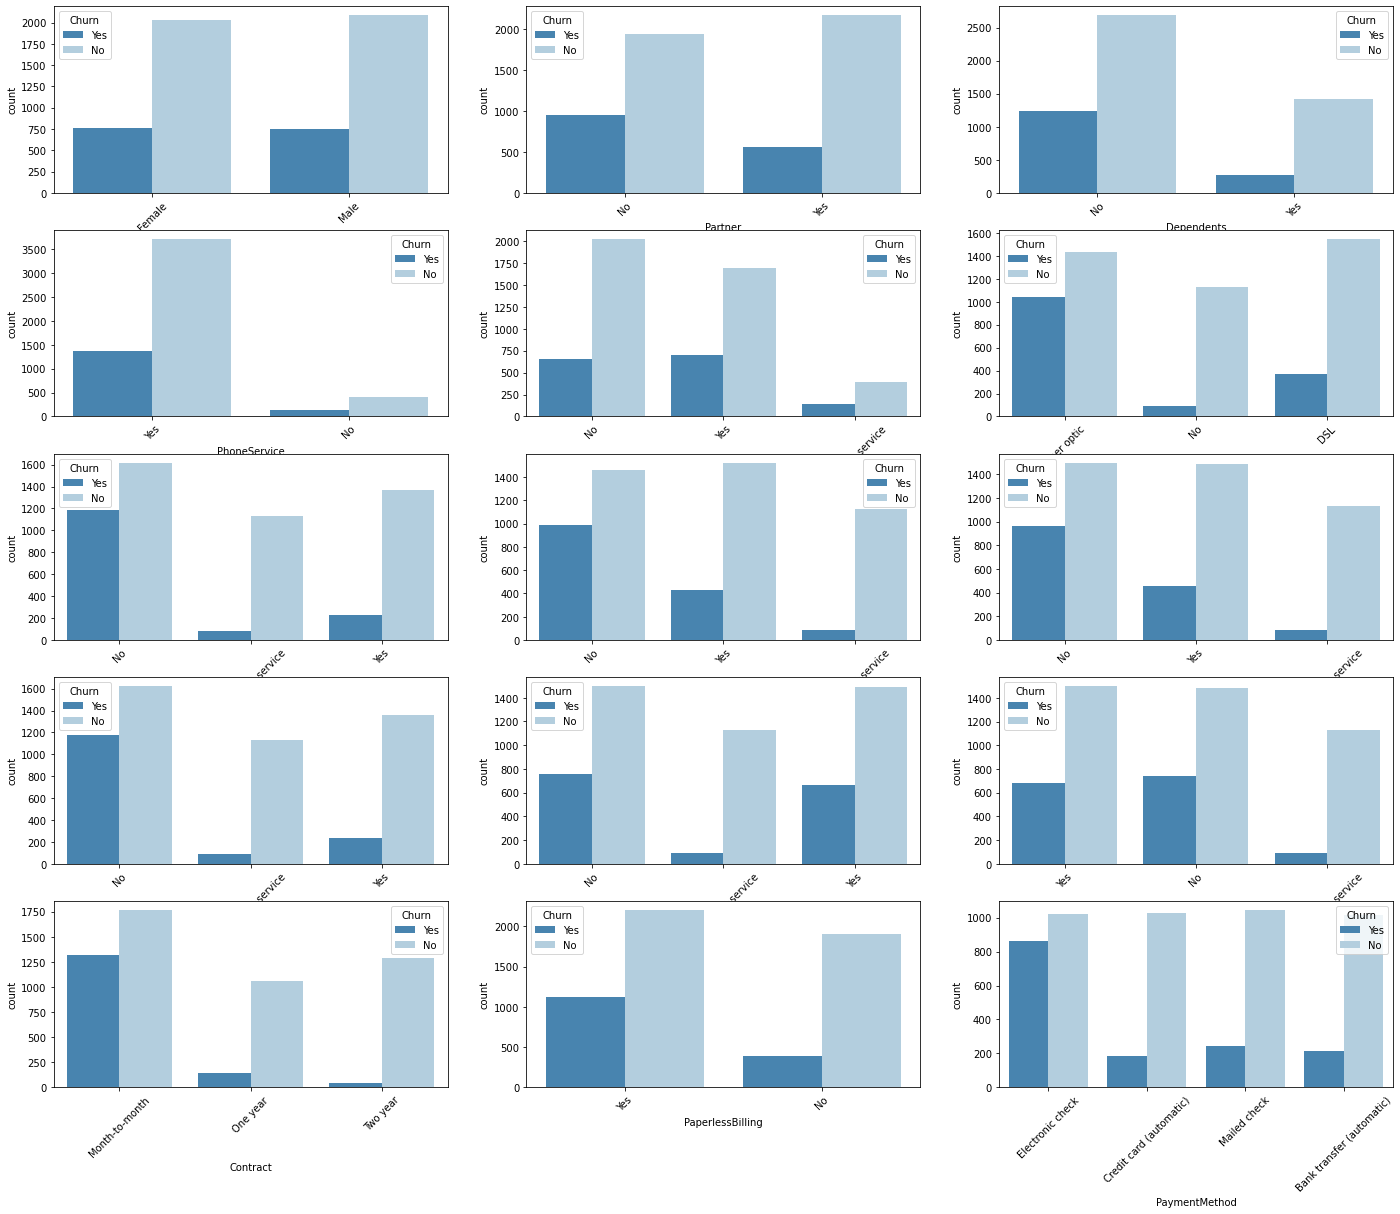

In [26]:
fig = plt.figure(figsize=(24,24))

counter = 0

for i in train_set.columns:
    if train_set[i].dtype == 'object' and i != 'Churn':
        sub = fig.add_subplot(6,3,counter+1)
        g = sns.countplot(x=i,data=train_set,palette='Blues_r',hue='Churn')
        plt.xticks(rotation=45)
        counter = counter + 1

## I can notice many things here... Which are : 
> - `male` and `female` don't really effect the `churn` <br><br> 
> - `partner` effect... but not great <br><br>
> - `PhoneService` really effect the `churn` <br><br>
> - `MultipleLines` effects `churn` <br><br>
> - And much more can be seen from the previous visualization

## Let's know more about our continous data....

In [27]:
for i in train_set.columns:
    if train_set[i].dtype != 'object' :
        print(Fore.LIGHTBLACK_EX,'\nNumber of unique data in the {} is : '.format(i)
              ,Fore.LIGHTBLUE_EX,len(train_set[i].unique()))

 
Number of unique data in the SeniorCitizen is :   2
 
Number of unique data in the tenure is :   73
 
Number of unique data in the MonthlyCharges is :   1486
 
Number of unique data in the TotalCharges is :   5286


<br><br>
### I can notice that number of unique values in `SeniorCitizen` is 2 (I should investigate why)

In [28]:
print(train_set['SeniorCitizen'].unique())

[0 1]


### Looking at the dataset source again I discovered that seniorcitizen should be categorical (0:False , 1:True)
### So I will change its type to object

In [29]:
train_set['SeniorCitizen'] = train_set['SeniorCitizen'].astype('object')
print(Fore.LIGHTBLUE_EX + '-> Type of "SeniorCitizen" column now is : ',train_set['SeniorCitizen'].dtype)

-> Type of "SeniorCitizen" column now is :  object


## Let's see the distribution of the continous data.....

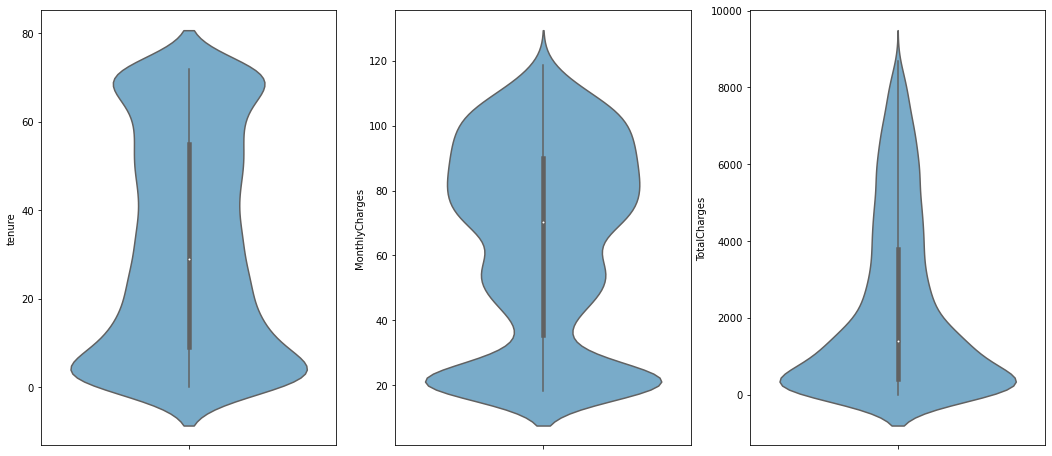

In [30]:
fig = plt.figure(figsize=(18,8))

counter = 0

for i in train_set.columns:
    if train_set[i].dtype != 'object' :
        sub = fig.add_subplot(1,3,counter+1)
        g = sns.violinplot(y=i,data=train_set,palette='Blues_r')
        counter = counter + 1

## Showing relative to `Dependent variable` 

<Figure size 1440x720 with 0 Axes>

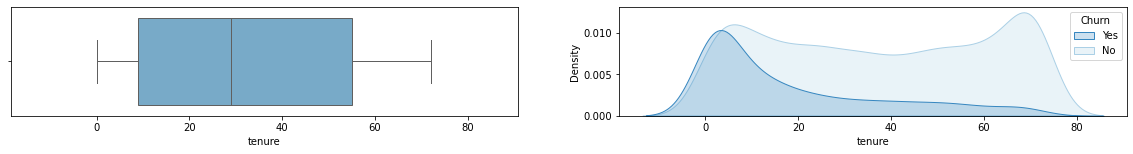

<Figure size 1440x144 with 0 Axes>

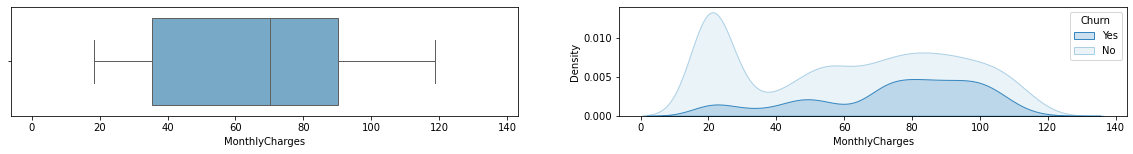

<Figure size 1440x144 with 0 Axes>

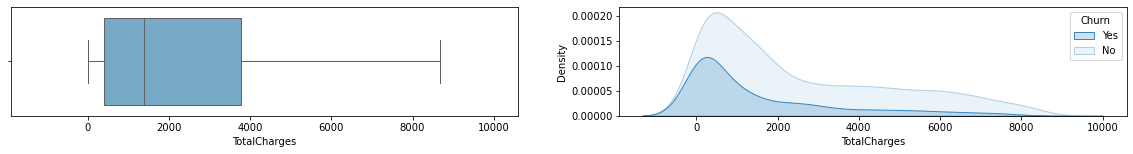

In [31]:
for i in train_set.columns:
    if train_set[i].dtype != 'object' :
        plt.figure()
    
        rcParams['figure.figsize'] = (20,2) 

        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True)
    
        plt.gca().set(xlabel= i,ylabel='Density')    
        sns.boxplot(train_set[i], ax=ax_box , linewidth= 1.0, palette='Blues')
        sns.kdeplot(train_set[i], ax=ax_kde , fill=True, palette='Blues_r',hue='Churn',data=train_set)
    
        plt.show()
        
rcParams['figure.figsize'] = (20,10) 

## From this plots I can notice that... 
> - `TotalCharges` has high skewness (using standerd scaler will be good). <br><br>
> - Other distributions looks very good.

<br><br>
## Let's visualize the realation between our continous data...

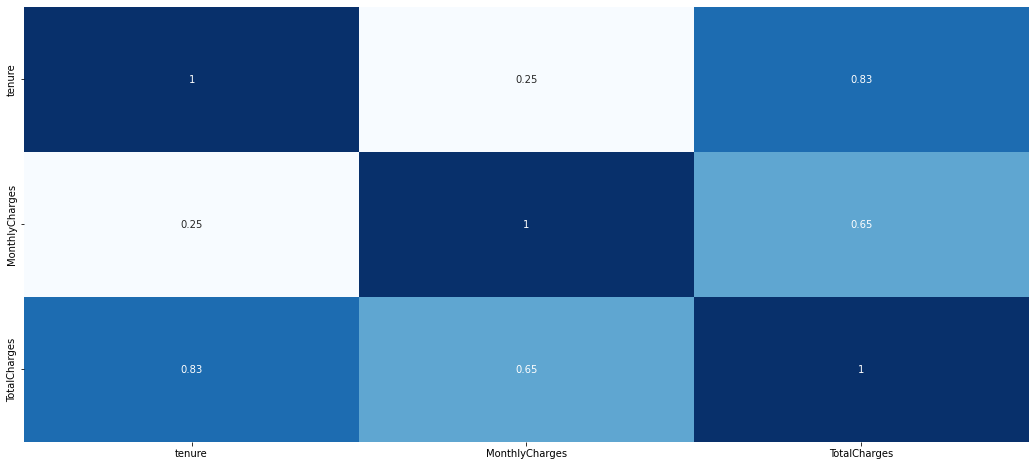

In [32]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(train_set.corr(), annot=True,cmap='Blues',cbar=False)

## This plot could be usefull if I wanted to reduce some features...

### Nothing usefull here :(

### Let's show scatter plots about how data works..


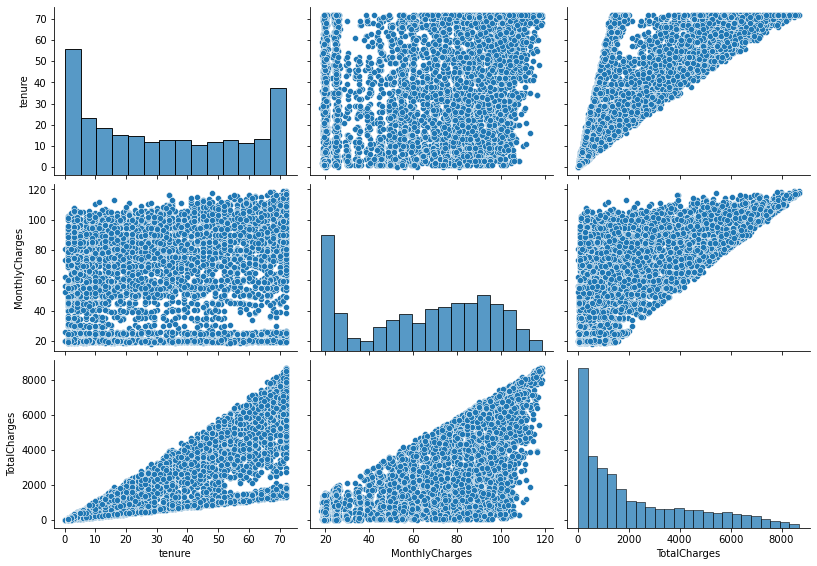

In [33]:
g = sns.pairplot(train_set[["tenure", "MonthlyCharges", "TotalCharges","Churn"]],palette='Blues_r')
g.fig.set_size_inches(12,8)
plt.show()

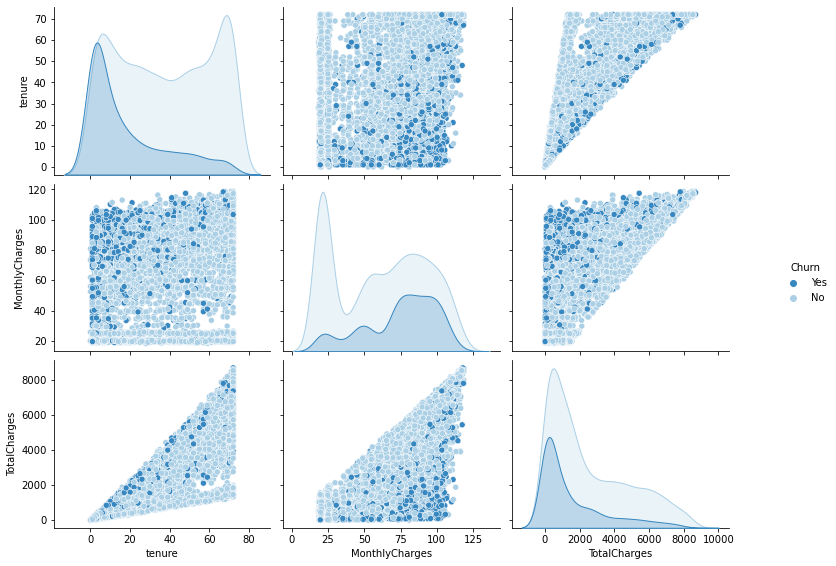

In [34]:
g = sns.pairplot(train_set[["tenure", "MonthlyCharges", "TotalCharges","Churn"]],hue='Churn',palette='Blues_r')
g.fig.set_size_inches(12,8)
plt.show()

## Ok I think there is no thing usefull here...

<br><br><br>
## Now I can fully understand my data (I saw the train data)

<br><br><br><br><br><br>
# Data Processing :
<br><br><br>

In [35]:
train_set.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3276,Female,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.15,317.25,Yes
6266,Male,1,No,No,33,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),83.85,2716.30,Yes
1324,Female,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,76.35,Yes
5201,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.90,164.60,No
4080,Female,0,Yes,Yes,29,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.10,692.55,No


### All Categorical columns : 

In [36]:
categorical_cols = []

for i in train_set.columns:
    if train_set[i].dtype == 'object':
        categorical_cols.append(i)

print(categorical_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


### I will remove `SeniorCitizen` as it is already encoded and `Churn` as it is our dependent variable

In [37]:
categorical_cols.remove('SeniorCitizen')
categorical_cols.remove('Churn')

## Function for cleaning `churn` feature...

In [38]:
def cleaning_churn(df):
    """
    input is a dataframe where it will replace yes in churn by 1 and no by 0
    """
    df['Churn'].replace({'Yes':1,'No':0},inplace=True)
    print(Fore.LIGHTBLUE_EX + 'Unique data is : ',Fore.LIGHTBLACK_EX , df['Churn'].unique())

In [39]:
cleaning_churn(y_train)

Unique data is :   [1 0]


## Now dealing with continous data :
### Continous columns are :
> - tenure <br><br>
> - MonthlyCharges <br><br>
> - TotalCharges

### For Continous data I will use `standard scaler` because there is skewness in data... ('TotalCharges')

In [40]:
X_train[['tenure','MonthlyCharges','TotalCharges']].skew()

tenure            0.242495
MonthlyCharges   -0.219775
TotalCharges      0.965658
dtype: float64

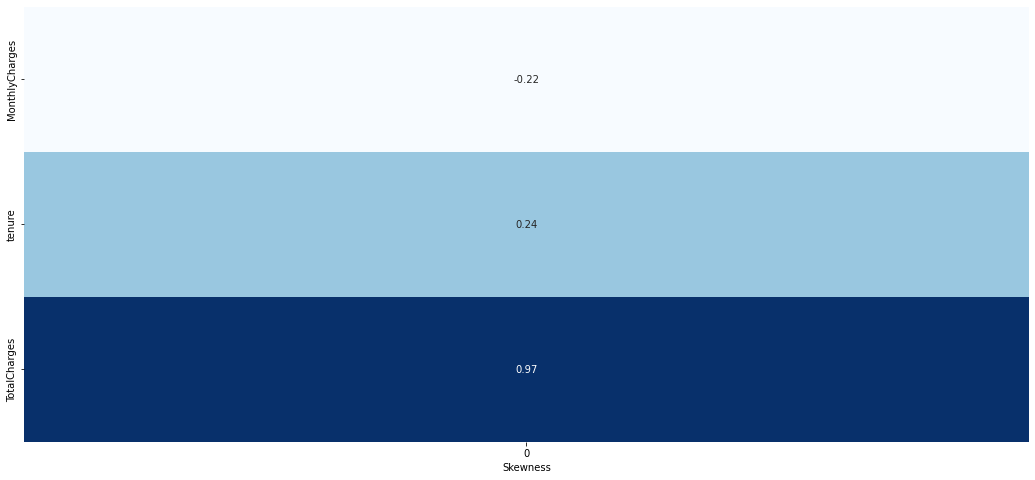

In [41]:
plt.figure(figsize=(18, 8))

sns.heatmap(pd.DataFrame(X_train[['tenure','MonthlyCharges','TotalCharges']].skew().sort_values(ascending=True)),
            cmap='Blues',annot=True,cbar=False)
plt.xlabel('Skewness')

plt.show()

In [42]:
X_train[['tenure','MonthlyCharges','TotalCharges']].head()

,tenure,MonthlyCharges,TotalCharges
3276,4,79.15,317.25
6266,33,83.85,2716.30
1324,4,20.35,76.35
5201,9,19.90,164.60
4080,29,26.10,692.55


In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
    
X_train[['tenure','MonthlyCharges','TotalCharges']] = sc.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3276,Female,0,No,No,-1.162519,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0.474849,-0.868118
6266,Male,1,No,No,0.026315,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),0.630667,0.191249
1324,Female,0,Yes,Yes,-1.162519,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,-1.474544,-0.974494
5201,Male,0,No,No,-0.957548,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,-1.489463,-0.935525
4080,Female,0,Yes,Yes,-0.137662,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,-1.283915,-0.702394


## Now dealing with categorical data :
### I will use ordinal encoder (here if we used one hot encoder there will be too many features)

In [44]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

X_train[categorical_cols] = enc.fit_transform(X_train[categorical_cols])

<br><br>
# OK !!.. Finally My train data is ready 
## I have to apply same functions on test... but let's take a look on our data :)

In [45]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3276,0.0,0,0.0,0.0,-1.162519,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,0.474849,-0.868118
6266,1.0,1,0.0,0.0,0.026315,1.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.630667,0.191249
1324,0.0,0,1.0,1.0,-1.162519,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,-1.474544,-0.974494
5201,1.0,0,0.0,0.0,-0.957548,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,-1.489463,-0.935525
4080,0.0,0,1.0,1.0,-0.137662,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,-1.283915,-0.702394


In [46]:
y_train.head()

,Churn
3276,1
6266,1
1324,1
5201,0
4080,0


# Functions we need to apply on test :
> - cleaning_total_charges(X_test) <br><br>
> - cleaning_churn(y_test)<br><br>
> - scale transform X_test <br><br>
> - transform X_test[categorical_cols]

### Running the functions :

In [47]:
cleaning_total_charges(X_test)
cleaning_churn(y_test)
X_test[['tenure','MonthlyCharges','TotalCharges']] = sc.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
X_test[categorical_cols] = enc.transform(X_test[categorical_cols])

Type of "TotalCharges" column now is :  float64
Number of nan values now is :  0


Unique data is :   [1 0]


# One last thing before the model...

## We can see from first plot that number of churn = no is too much more than churn = yes... So we will under sample the data.

### Look at `train_set` again... I will get index from it when churn='yes' and when churn='no'

### Then I will make same number of churn of (yes and no) enter the model..

In [48]:
yes_churn = train_set[train_set['Churn'] == 'Yes']
no_churn = train_set[train_set['Churn'] == 'No']

print(Fore.LIGHTBLUE_EX+'Number of data with churn = 1 is :',len(yes_churn))
print(Fore.LIGHTBLUE_EX+'\nNumber of data with churn = 0 is :',len(no_churn))

Number of data with churn = 1 is : 1505

Number of data with churn = 0 is : 4111


### So I will make the data which enters the model as 1505 row churn=1 and 1505 churn=0

## I will choose these columns by randoming

In [49]:
np.random.seed(10)
n = len(yes_churn)  
index = np.random.choice(no_churn.index,n ,replace=False)  

print(Fore.LIGHTBLUE_EX+'Number of rows containing churn=0 entering the model is :',no_churn.loc[index].shape[0])
print(Fore.LIGHTBLUE_EX+'Number of rows containing churn=1 entering the model is :',yes_churn.shape[0])

Number of rows containing churn=0 entering the model is : 1505
Number of rows containing churn=1 entering the model is : 1505


## Appending the two arrays together : 

In [50]:
new_index = np.append(index,yes_churn.index)
print(len(new_index))

3010


## Modifing data entering the model :

In [51]:
X_train = X_train.loc[new_index]
y_train = y_train.loc[new_index]

## Making sure that number of churn=0 equals churn=1 :

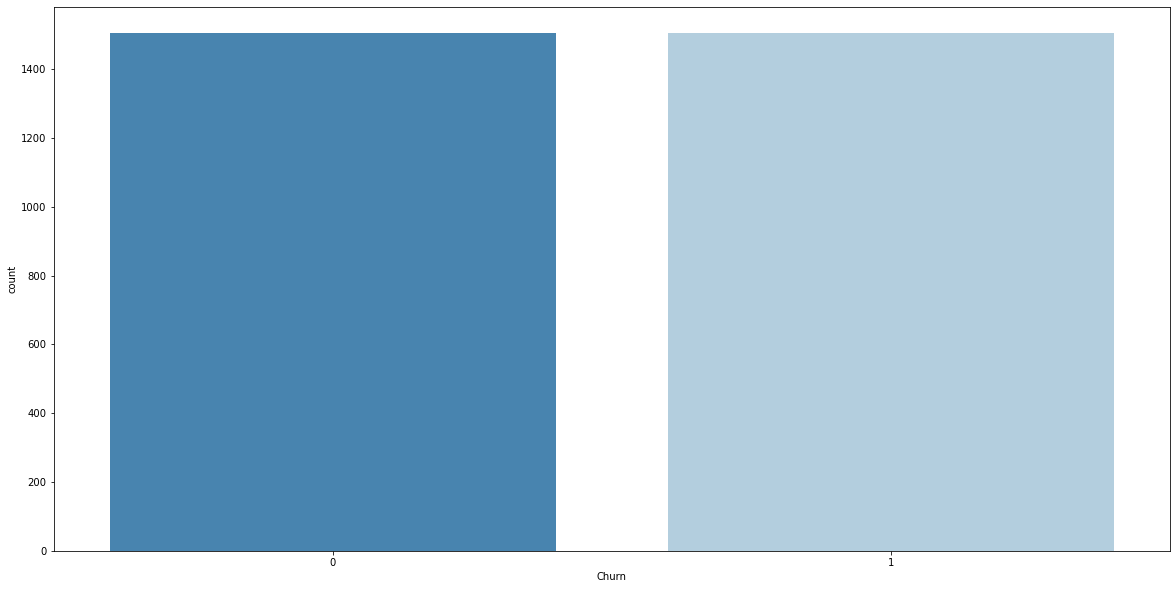

In [52]:
sns.countplot(x='Churn',data=y_train,palette='Blues_r')
plt.show()

# Perfect !!
## My data is ready :)

<h1><center><center><h1><h1><center><span style="color:#2189b5">The Machine Learning Model</span><center><h1>

# Ok data is clean and well handled now....


### I will run lazypredict to show best models on my data :

In [53]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

classify = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = classify.fit(X_train, X_test, y_train, y_test)

models.head(30)

 14%|███████████▍                                                                       | 4/29 [00:00<00:05,  4.75it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:04<00:00,  7.58it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  6.72it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.74,0.76,0.76,0.75,0.59
LogisticRegression,0.74,0.76,0.76,0.75,0.03
LinearSVC,0.73,0.76,0.76,0.75,0.21
AdaBoostClassifier,0.74,0.76,0.76,0.75,0.14
RidgeClassifierCV,0.73,0.76,0.76,0.75,0.02
LinearDiscriminantAnalysis,0.73,0.76,0.76,0.75,0.02
RidgeClassifier,0.73,0.76,0.76,0.75,0.01
BernoulliNB,0.73,0.75,0.75,0.75,0.01
NearestCentroid,0.72,0.75,0.75,0.74,0.01


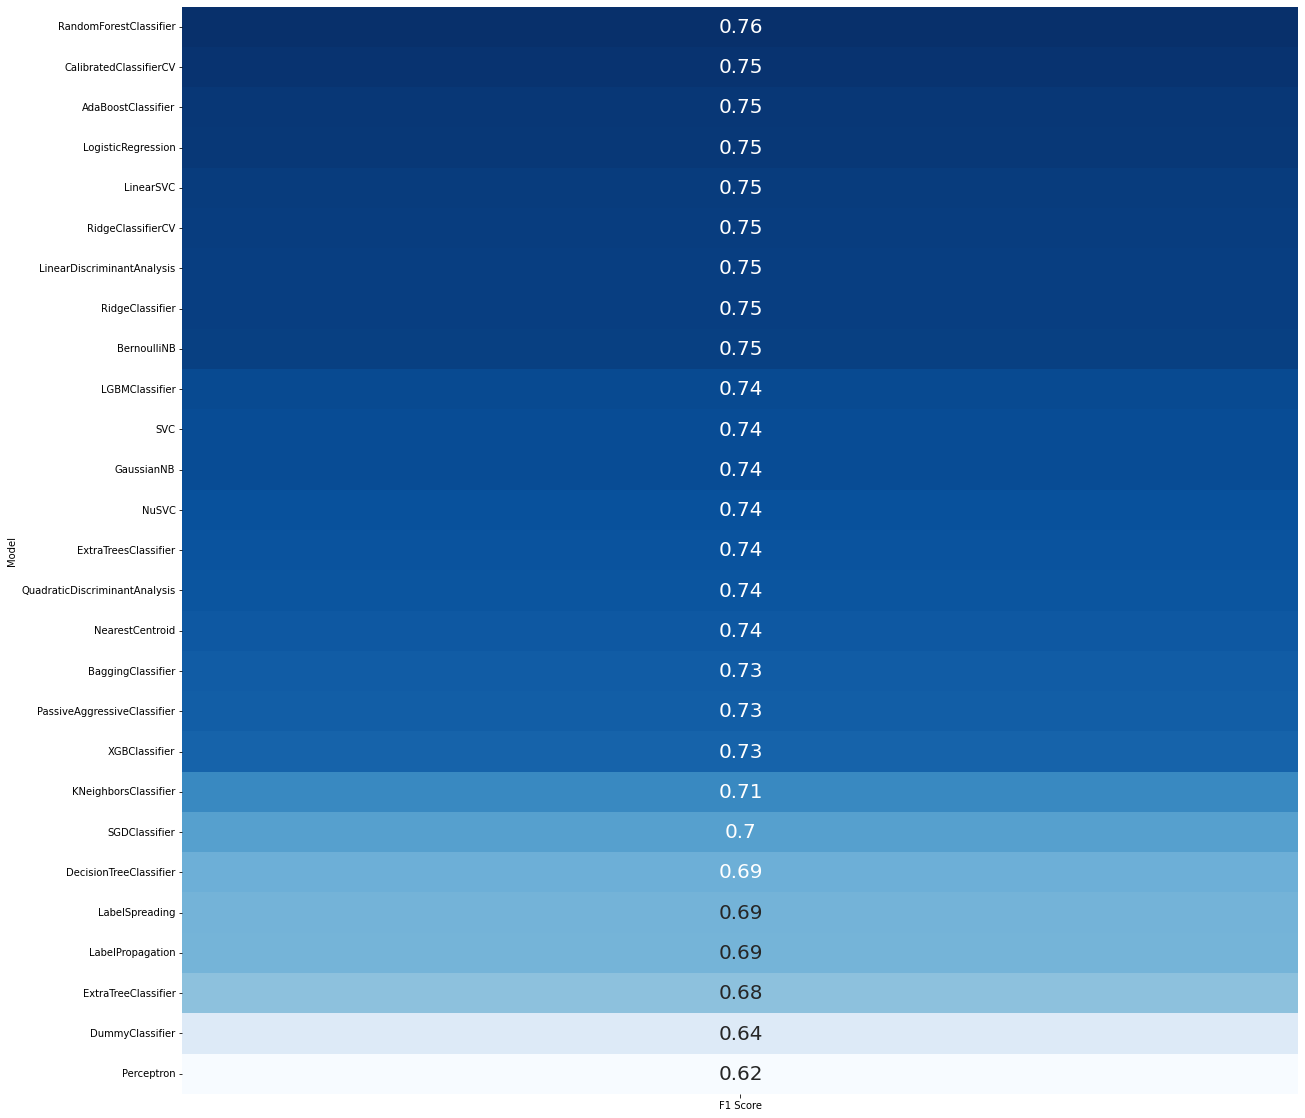

In [54]:
plt.figure(figsize=(20, 20))

sns.heatmap(pd.DataFrame(models['F1 Score']).sort_values(by='F1 Score',ascending=False),
            cmap='Blues',annot=True,cbar=False,annot_kws={"size": 20})

plt.show()

## Let's see our models :

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [56]:
def model_accuracies(y_pred, y_test):
    """
    function for getting accuracies
    """
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
    print("Classification Report:\n",classification_report(y_test, y_pred))
    print("ROC AUC Score:",roc_auc_score(y_test, y_pred))

### Logestic regression :

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
model_accuracies(y_pred, y_test)

Accuracy: 0.7359430604982207
Confusion Matrix:
 [[749 304]
 [ 67 285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80      1053
           1       0.48      0.81      0.61       352

    accuracy                           0.74      1405
   macro avg       0.70      0.76      0.70      1405
weighted avg       0.81      0.74      0.75      1405

ROC AUC Score: 0.7604800677717344


### Random Forest :

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
model_accuracies(y_pred, y_test)

Accuracy: 0.7359430604982207
Confusion Matrix:
 [[764 289]
 [ 82 270]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.80      1053
           1       0.48      0.77      0.59       352

    accuracy                           0.74      1405
   macro avg       0.69      0.75      0.70      1405
weighted avg       0.80      0.74      0.75      1405

ROC AUC Score: 0.7462957567124234


### SVC :

In [59]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
model_accuracies(y_pred, y_test)

Accuracy: 0.7316725978647687
Confusion Matrix:
 [[753 300]
 [ 77 275]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1053
           1       0.48      0.78      0.59       352

    accuracy                           0.73      1405
   macro avg       0.69      0.75      0.70      1405
weighted avg       0.80      0.73      0.75      1405

ROC AUC Score: 0.7481748575498576


## I will choose Logestic regression as my model...

### Now hyper tunning my model :

In [60]:
LR = LogisticRegression(multi_class= 'ovr', max_iter= 1000, n_jobs= -1)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
grid = GridSearchCV(LR, param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 1/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   2.2s
[CV 2/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   0.3s
[CV 3/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   0.4s
[CV 4/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   0.4s
[CV 5/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   0.3s
[CV 1/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 2/5] END C=0.001, penalty

[CV 3/5] END ....C=100, penalty=l1, solver=saga;, score=0.754 total time=   0.0s
[CV 4/5] END ....C=100, penalty=l1, solver=saga;, score=0.782 total time=   0.0s
[CV 5/5] END ....C=100, penalty=l1, solver=saga;, score=0.766 total time=   0.0s
[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.787 total time=   0.0s
[CV 2/5] END C=100, penalty=l2, solver=liblinear;, score=0.751 total time=   0.0s
[CV 3/5] END C=100, penalty=l2, solver=liblinear;, score=0.754 total time=   0.0s
[CV 4/5] END C=100, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=100, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 1/5] END ....C=100, penalty=l2, solver=saga;, score=0.787 total time=   0.0s
[CV 2/5] END ....C=100, penalty=l2, solver=saga;, score=0.751 total time=   0.0s
[CV 3/5] END ....C=100, penalty=l2, solver=saga;, score=0.754 total time=   0.0s
[CV 4/5] END ....C=100, penalty=l2, solver=saga;, score=0.782 total time=   0.0s
[CV 5/5] END ....C=100,

{'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

In [61]:
LR = LogisticRegression(max_iter= 1500, n_jobs= -1, C = 100, solver = 'liblinear'
                        ,penalty = 'l1').fit(X_train, y_train)

y_pred = LR.predict(X_test)

In [62]:
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions()
cnf_matrix

array([[749, 304],
       [ 67, 285]], dtype=int64)

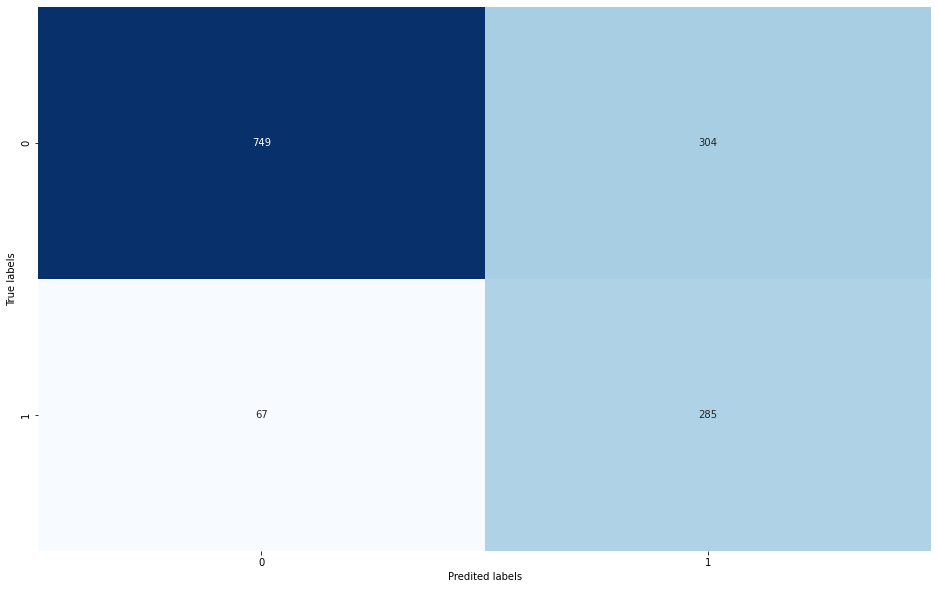

In [63]:
plt.figure(figsize=(16, 10))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,fmt='.3g',cbar=False)

plt.xlabel('Predited labels')
plt.ylabel('True labels')
plt.show()